<h1 STYLE="padding-left:1em;text-align: center;">Projet 05 : Catégorisez automatiquement des questions </h1> 

#  Introduction  
<p STYLE="padding-left:1em;text-align:justify;">Dans ce projet, nous allons proposer une analyse textuelle des questions posées sur le site de 'Stackoverflow' afin de développer un système de suggestion de tag pour le site. Celui-ci prendra la forme d'un algorithme de machine learning qui assignera automatiquement plusieurs tags à une question posée. 

<p STYLE="padding-left:1em;text-align:justify;">Ce notebook regroupe les tests des modèles menés sur le jeux de données avec des approches non supervisées et supervisées afin de prédire les tags des questions posées sur le site de Stackoverflow.

# Sommaire
<a href="#1" STYLE="padding-left:1em;color:black"><b>Etape 1 : Importation des librairies et des fonctions graphiques</b></a><br>
<a href="#2" STYLE="padding-left:1em;color:black"><b>Etape 2 : Importation des données et sélection des variables pertinentes</b></a><br>
<a href="#3" STYLE="padding-left:1em;color:black"><b>Etape 3 : Approche non supervisée</b></a><br>
<a href="#3.1" STYLE="padding-left:2em;color:black">3.1 Latent Dirichlet Allocation</a><br>
<a href="#3.1.1" STYLE="padding-left:3em;color:black">3.1.1 Librairie Scikit-Learn</a><br>
<a href="#3.1.1a" STYLE="padding-left:4em;color:black">3.1.1a Bag of words</a><br>
<a href="#3.1.1b" STYLE="padding-left:4em;color:black">3.1.1b TF-IDF</a><br>
<a href="#3.1.2" STYLE="padding-left:3em;color:black">3.1.2 Librairie gensim</a><br>
<a href="#3.1.2a" STYLE="padding-left:4em;color:black">3.1.2a Bag of words</a><br>
<a href="#3.1.2b" STYLE="padding-left:4em;color:black">3.1.2b TF-IDF</a><br>
<a href="#3.2" STYLE="padding-left:2em;color:black">3.2 Non-Negative Matrix Factorization (NMF)</a><br>
<a href="#4" STYLE="padding-left:1em;color:black"><b>Etape 4 : Approche supervisée</b></a><br>
<a href="#4.1" STYLE="padding-left:2em;color:black">4.1 Réduction dimensionnelle PCA</a><br>
<a href="#4.1.1" STYLE="padding-left:3em;color:black">4.1.1 Bag of words</a><br>
<a href="#4.1.2" STYLE="padding-left:3em;color:black">4.1.2 TF-IDF</a><br>
<a href="#4.2" STYLE="padding-left:2em;color:black">4.2 Tests de modèles de classification</a><br>
<a href="#4.2.1" STYLE="padding-left:3em;color:black">4.2.1 Bag of words</a><br>
<a href="#4.2.2" STYLE="padding-left:3em;color:black">4.2.2 TF-IDF</a><br>


# <a STYLE="color:black" id="1">Etape 1 : Importation des librairies et des fonctions graphiques 

In [1]:
%matplotlib inline

from ast import literal_eval

import os
from pathlib import Path
import re

from time import time
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection

from operator import itemgetter
import collections
from collections import Counter,defaultdict

import pickle

from joblib import parallel_backend, Parallel, delayed , dump , load
from joblib import wrap_non_picklable_objects
from joblib.externals.loky import set_loky_pickler

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer

from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF, PCA

import gensim
from gensim.models import TfidfModel
import gensim.corpora as corpora
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models 

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth', 200)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bud64\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bud64\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<p STYLE="padding-left:1em;color:blue;"><b>Configuration générale des différents graphiques <font>

In [2]:
plt.rcdefaults()
font_title = {'color': 'blue','weight': 'bold','size': 14}
font_label = {'size': 12}
font_ticks = 12
font_legend = 10
c = []
[c.append(plt.cm.tab20(i)) for i in range(20)]
    
def config_plt(plot = plt, ax = None, title = 'titre', X_name = 'x' , Y_name = 'y' , legend = ''):   
    if plot == plt :
        plot.title(title,fontdict=font_title)
        plot.xlabel(X_name,fontdict=font_label)
        plot.ylabel(Y_name,fontdict=font_label)
        plot.xticks(fontsize =font_ticks)
        plot.yticks(fontsize =font_ticks)
        if legend is not None:
            plot.legend(title = legend , fontsize =font_legend)
    else : 
# Sub-plot
        ax.set_title(title,fontdict=font_title)
        ax.set_xlabel(X_name,fontdict=font_label)
        ax.set_ylabel(Y_name,fontdict=font_label)
        ax.tick_params(axis='x', labelsize=font_ticks)
        ax.tick_params(axis='y', labelsize=font_ticks)
        if legend is not None: 
            ax.legend(title = legend , fontsize =font_legend)

In [3]:
def plot_line(DF, x_cols,cols, categorie= None,Nb_cols=2,marker = '',length=None,width=None,x_lim=None,y_lim =None,title=None,x_name=None,y_name=None,legend=None):
    label = dict() if 'label' not in globals() else globals()['label'] 
    x_cols = [x_cols] if np.array([x_cols]).size == 1 else x_cols 
    cols = [cols]  if np.array([cols]).size == 1 else cols 
    Nb_var =  1 if np.array([cols]).size == 1 else len(cols)
    Nb_row = int(0.5 + Nb_var/Nb_cols) if Nb_cols> 1 else 1
    width = 4*Nb_cols if width is None else width
    length = 4*Nb_row if length is None else length
    fig = plt.figure(figsize=(width,length))    
    for i in range(0,Nb_var):
        axes = fig.add_subplot(Nb_row,Nb_cols,i+1)
        if categorie is None : 
            if len(x_cols)==1:
                axes.plot(DF[x_cols[0]],DF[cols[i]],color = c[0],marker = marker)
            else : 
                axes.plot(DF[x_cols[i]],DF[cols[i]],color = c[0],marker = marker)
        else :
            k=0
            for cat in DF[categorie].unique():
                DF_frac = DF[DF[categorie] == cat]
                if len(x_cols)==1:
                    axes.plot(DF_frac[x_cols[0]],DF_frac[cols[i]],color = c[k],marker = marker,label = cat)
                else : 
                    axes.plot(DF_frac[x_cols[i]],DF_frac[cols[i]],color = c[k],marker = marker, label = cat)
                k+=1
            legend = str(cat if label.get(cat) is None else label.get(cat))
            
        axes.set_xlim(x_lim) if x_lim !=None else None    
        axes.set_ylim(y_lim) if y_lim !=None else None
        
        axes.grid(visible=True,axis='x')
        
        (axes.set_xticks(DF[x_cols[0]]) if axes is not plt else axes.xticks(DF[x_cols[0]])) if DF[x_cols[0]].size<=15 else None 
        
        j = 0 if len(x_cols)==1 else i
        title_plt = '' if title is None else [title if len([cols]) == 1 else title[i]]    
        if x_name is None : 
            x = str(x_cols[j] if label.get(x_cols[j]) is None else label.get(x_cols[j]))
        else : 
            x = x_name if np.array([x_name]).size == 1 else x_name[j]
        if y_name is None : 
            y = str(cols[i] if label.get(cols[i]) is None else label.get(cols[i]))
        else : 
            y = y_name if np.array([y_name]).size == 1 else x_name[i]
            
        config_plt(plot = 'None', ax = axes , title = title_plt , X_name = x, Y_name = y , legend = legend)
        fig.tight_layout()
    plt.show()
    
def display_scree_plot(pca):
    fig=plt.figure(figsize=(4,4))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    x_name = "rang de l'axe d'inertie"
    y_name = "pourcentage d'inertie"
    title="Eboulis des valeurs propres"
    config_plt(plot = plt , ax = None , title = title , X_name = x_name , Y_name = y_name , legend = None)
    plt.show(block=False)

# <a STYLE="color:black" id="2">Etape 2 : Importation des données 

In [4]:
from joblib import Memory

location = './Cachedir/'
mem = Memory(location,mmap_mode='r+',verbose=0)
if 'data_words_tf' not in locals():
    mem.clear(warn=False)

In [5]:
%%time
file_data_clean = os.path.abspath('')+'\\Data_Clean'

data_merge = load(file_data_clean+'\\data_merge.joblib')
DF_words_tags = load(file_data_clean+'\\DF_words_tags.joblib')

counter_word = load(file_data_clean+'\\counter_word.joblib')
counter_word_tags = load(file_data_clean+'\\counter_word_tags.joblib')
counter_tags = load(file_data_clean+'\\counter_tags.joblib')

data_words_tf = load(file_data_clean+'\\data_words_tf.joblib')
data_words_tf_tags = load(file_data_clean+'\\data_words_tf_tags.joblib')

data_words_tf_idf = load(file_data_clean+'\\data_words_tf_idf.joblib')
data_words_tf_idf_tags = load(file_data_clean+'\\data_words_tf_idf_tags.joblib')

Wall time: 6.71 s


In [6]:
data_words_tf

,able,access,account,achieve,action,actual,actually,add,address,advance,allow,already,also,always,android,another,answer,anyone,anything,api,app,appear,append,application,apply,appreciate,approach,args,argument,around,array,ask,async,attempt,attribute,auto,available,avoid,await,back,background,bar,base,best,bin,bit,block,body,bottom,box,break,browser,build,button,c,c++,calculate,call,cannot,case,catch,cause,center,change,character,check,child,class,click,client,close,code,color,column,come,command,comment,compile,complete,component,condition,config,configuration,configure,connect,connection,consider,console,console.log,const,contain,container,contains,content,context,control,convert,copy,core,correct,...,solution,solve,someone,something,sort,source,space,specific,specify,sql,src,stack,start,state,statement,static,status,std,step,still,stop,store,str,stream,string,struct,structure,studio,style,success,successfully,suggestion,sum,support,suppose,sure,switch,system,table,tag,take,target,task,tell,template,test,text,thank,thanks,thing,think,though,thought,thread,throw,time,title,token,tool,top,total,trigger,true,try,two,type,unable,undefined,understand,update,url,us,use,user,username,utf,val,value,var,variable,version,via,view,void,want,warn,way,web,website,well,width,window,within,without,wonder,word,work,would,write,wrong
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# <a STYLE="color:black" id="3">Etape 3 : Approche non supervisée
## <a STYLE="color:black" id="3.1">3.1 Latent Dirichlet Allocation</a>
<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Nous allons utiliser le modèle LDA (Latent Dirichlet Allocatioon) pour essayer de taguer nos questions de façon non supervisée. Ce modèle est un modèle probabiliste génératif qui permet de regrouper du texte non classifié en catégories ou sujets composées de mots.
    
## <a STYLE="padding-left:1em;color:black" id="3.1.1">3.1.1 Librairie Scikit-Learn</a> 
### <a STYLE="padding-left:2em;color:black" id="3.1.1a">3.1.1a Bag of words</a> 

In [7]:
n_topics = np.append(np.arange(2,20),[20,30 , 40 , 50])

In [8]:
@delayed
@wrap_non_picklable_objects
def fit_LDA(DF, n_components):
    from sklearn.decomposition import LatentDirichletAllocation as LDA
    lda = LDA(n_components,learning_method='online')
    model_lda = lda.fit(DF)
    lda_perplexity = lda.perplexity(DF)
    lda_score = lda.score(DF)
    return lda_perplexity , lda_score

# Fonction pour calcul parallèle de la boucle for 
def applyParallel_LDA(df, func, iteration):   
    resultat = Parallel(n_jobs=-1)(func(df , i) for i in iteration)
    lda_perplexity , lda_score = zip(*resultat)
    data = pd.DataFrame(np.array([iteration , lda_score , lda_perplexity]).T , 
                        columns = ['n_topics' , 'lda_score' , 'lda_perplexity']) 
    plot_line(data,'n_topics',['lda_score','lda_perplexity'],marker = 'o',Nb_cols=2)
    return data

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

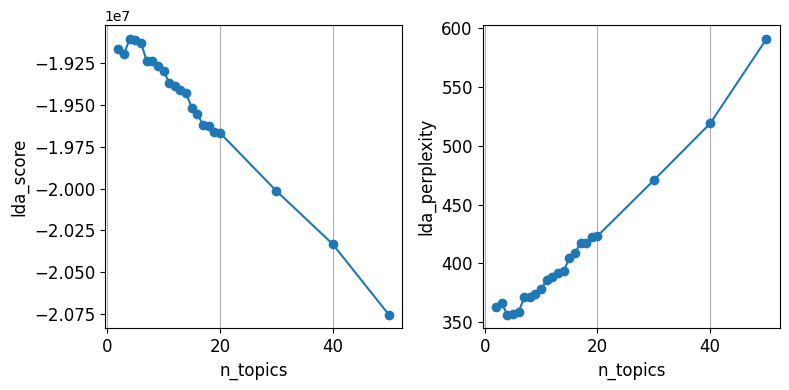

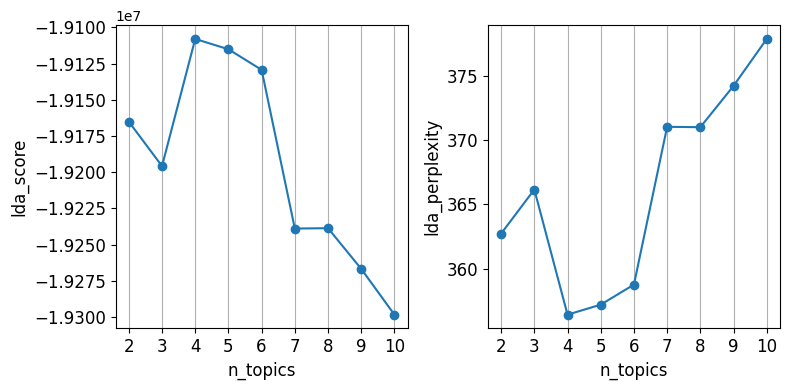

Wall time: 1h 12min 53s


In [9]:
%%time
LDA_score  = applyParallel_LDA(data_words_tf, fit_LDA , n_topics )
plot_line(LDA_score.iloc[0:9],'n_topics',['lda_score','lda_perplexity'],marker = 'o',Nb_cols=2)

In [10]:
%%time
best_topics = LDA_score['lda_score'].argmax()
model_lda_best = LDA(n_components = best_topics , learning_method='online',n_jobs=-1).fit(data_words_tf)
no_top_words = 10
display_topics(model_lda_best, data_words_tf.columns, no_top_words)

Topic 0:
use try error get http work file code run app
Topic 1:
use like want code value try would get way one
Wall time: 3min 24s


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Nous observons que les scores obtenus à partir de la librairie Sklearn <span STYLE="color:gray;" ><i>(log likelihood & perplexity )</i></span>ne permettent pas d'obtenir un nombre optimal de topics.  

### <a STYLE="padding-left:2em;color:black" id="3.1.1b">3.1.1b TD-IDF</a> 

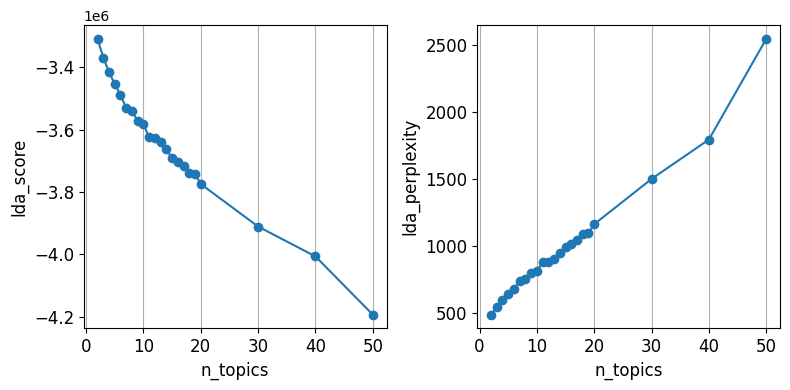

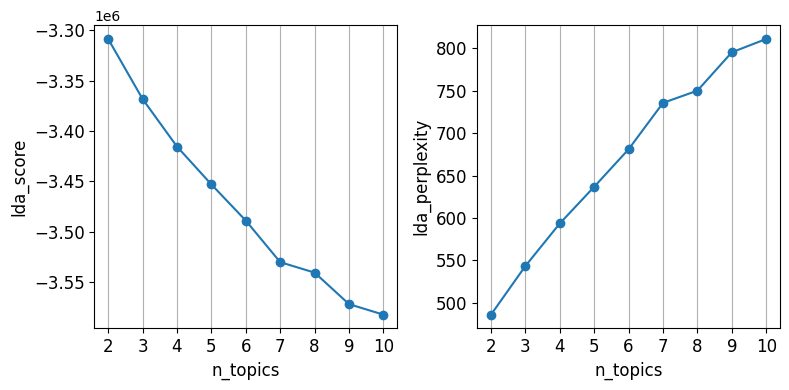

Wall time: 55min 39s


In [11]:
%%time
LDA_score_TF_IDF  = applyParallel_LDA(data_words_tf_idf, fit_LDA , n_topics )
plot_line(LDA_score_TF_IDF.iloc[0:9],'n_topics',['lda_score','lda_perplexity'],marker = 'o',Nb_cols=2)

In [12]:
%%time
best_topics = LDA_score_TF_IDF['lda_score'].argmax()
model_lda_best_TF_IDF = LDA(n_components = best_topics , learning_method='online',n_jobs=-1).fit(data_words_tf_idf)
no_top_words = 10
display_topics(model_lda_best_TF_IDF, data_words_tf_idf.columns, no_top_words)

Topic 0:
error file use http run get try app work user
Topic 1:
like value want would use example data way one code
Wall time: 2min 56s


<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Nous observons que les scores obtenus à partir de la librairie Sklearn <span STYLE="color:gray;" ><i>(log likelihood & perplexity )</i></span>ne permettent pas d'obtenir un nombre optimal de topics.  

## <a STYLE="padding-left:1em;color:black" id="3.1.2">3.1.2 Librairie gensim</a> 
### <a STYLE="padding-left:2em;color:black" id="3.1.2a">3.1.2a Bag of words</a> 

In [13]:
def gensim_prepocessing(DF , TF_IDF = False):
    texts =  DF.apply(lambda x : x.split()).to_list()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    if TF_IDF == True : 
        tfidf = TfidfModel(corpus)
        corpus_out = [tfidf[t] for t in corpus]
    else :
        corpus_out = corpus
    return texts , dictionary, corpus_out

@delayed
@wrap_non_picklable_objects
def fit_LDA_gensim(corpus, dictionary , num_topics):
    from gensim.models.ldamodel import LdaModel
    model = LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,random_state=10)
    lda_perplexity = model.log_perplexity(corpus)
    return model , lda_perplexity 

@delayed
@wrap_non_picklable_objects
def fit_LDAMulticore_gensim(corpus, dictionary , num_topics):
    from gensim.models.ldamulticore import LdaMulticore
    model = LdaMulticore(corpus=corpus,id2word=dictionary,num_topics=num_topics,workers = 7 , random_state=10)
    lda_perplexity = model.log_perplexity(corpus)
    return model , lda_perplexity 

@delayed
@wrap_non_picklable_objects
def fit_coherence(model , texts, dictionary ):
    from gensim.models import CoherenceModel
    coherence_model_lda = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    lda_coherence = coherence_model_lda.get_coherence()      
    return lda_coherence

# Fonction pour calcul parallèle de la boucle for 
def applyParallel_LDA_gensim(DF,func, iteration , TF_IDF = False):
    texts , dictionary ,corpus = gensim_prepocessing(DF , TF_IDF = TF_IDF) 
    resultat = Parallel(n_jobs=-1)(func(corpus, dictionary , num_topics) for num_topics in iteration)
    models, lda_perplexity = zip(*resultat)
    lda_coherence = Parallel(n_jobs=-1 , prefer = 'threads')(fit_coherence(model, texts, dictionary) for model in models)

    data = pd.DataFrame(np.array([iteration , lda_coherence , lda_perplexity]).T , 
                        columns = ['n_topics' , 'lda_coherence' , 'lda_perplexity']) 
    
    plot_line(data,'n_topics',['lda_coherence','lda_perplexity'],marker = 'o',Nb_cols=2)
    return models , data

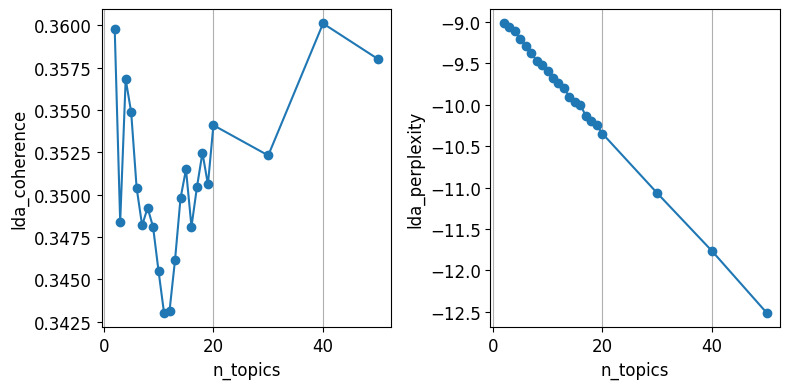

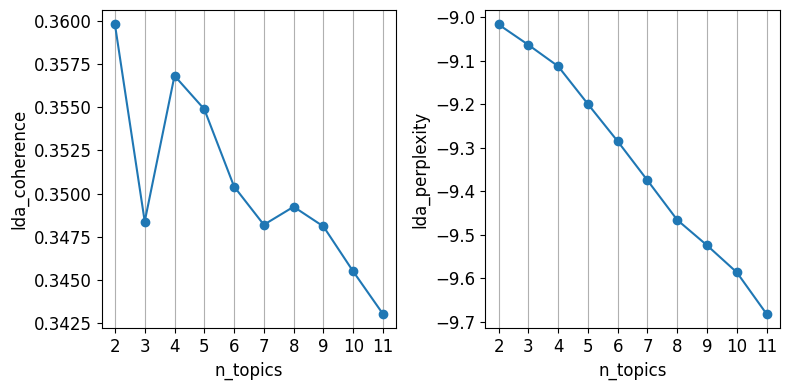

Wall time: 58min 46s


In [14]:
%%time
model_list_LDAmulticore , data_LDAmulticore_score = applyParallel_LDA_gensim(DF_words_tags.Questions,fit_LDAMulticore_gensim,n_topics)
plot_line(data_LDAmulticore_score.iloc[0:10],'n_topics',['lda_coherence','lda_perplexity'],marker = 'o',Nb_cols=2)

In [15]:
pyLDAvis.enable_notebook()
best_topics = data_LDAmulticore_score['lda_coherence'].argmax()
texts , dictionary, corpus = gensim_prepocessing(DF_words_tags.Questions)
pyLDAvis.gensim_models.prepare(model_list_LDAmulticore[best_topics], corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
26    -0.063953 -0.061834       1        1  17.935031
27    -0.067347 -0.057600       2        1  12.786626
12    -0.045542 -0.055224       3        1   7.568081
39    -0.083415  0.097047       4        1   7.492762
30    -0.071278  0.040054       5        1   7.421788
14    -0.047952  0.051890       6        1   4.177172
8     -0.007361 -0.070783       7        1   2.707993
15    -0.020863 -0.036840       8        1   2.544461
6     -0.036419 -0.027483       9        1   2.344496
20    -0.014299  0.006291      10        1   2.322944
37    -0.045081  0.005560      11        1   2.312977
32    -0.025246  0.042422      12        1   2.199395
16     0.006150 -0.003378      13        1   1.946072
17    -0.011130  0.020618      14        1   1.839852
0      0.008633 -0.000076      15        1   1.697758
11     0.041264 -0.002031      16        1   1.694572
25    -0.007222 -0.036923      17        1   1.596439
31    -0.017940 -0.009260      18        1   1.529223
21    -0.022275  0.011789      19        1   1.509591
24     0.001319 -0.008672      20        1   1.504690
29    -0.016627  0.027430      21        1   1.468557
9     -0.028609 -0.026119      22        1   1.383985
3      0.022953 -0.070776      23        1   1.375129
2     -0.011459  0.002559      24        1   1.205068
28     0.001119  0.021824      25        1   1.081865
18     0.002074  0.003132      26        1   0.922757
35     0.045838 -0.045446      27        1   0.894101
13    -0.013399  0.035299      28        1   0.885487
19     0.022446 -0.029315      29        1   0.767120
22     0.054746  0.006177      30        1   0.652870
5      0.028819 -0.006163      31        1   0.567133
4      0.058335  0.014837      32        1   0.547801
7      0.022704  0.021099      33        1   0.540224
1      0.041817  0.024998      34        1   0.413774
33     0.025503  0.039287      35        1   0.412107
10     0.060894  0.007607      36        1   0.370984
34     0.078261 -0.004376      37        1   0.354970
23     0.047476  0.026490      38        1   0.348517
36     0.045062  0.024309      39        1   0.346318
38     0.042003  0.021579      40        1   0.329313, topic_info=         Term          Freq         Total Category  logprob  loglift
55        use  59044.000000  59044.000000  Default  30.0000  30.0000
18        try  42910.000000  42910.000000  Default  29.0000  29.0000
7         get  41069.000000  41069.000000  Default  28.0000  28.0000
2        code  38447.000000  38447.000000  Default  27.0000  27.0000
47       like  34459.000000  34459.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
101       one     52.250477  21999.961504  Topic40  -5.9789  -0.3268
553      time     46.832569  16819.407755  Topic40  -6.0884  -0.1678
537      type     47.475410  18431.085445  Topic40  -6.0747  -0.2457
149      need     48.668334  22246.462094  Topic40  -6.0499  -0.4090
83   function     47.179903  22825.634271  Topic40  -6.0810  -0.4658

[3873 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
39090      2  0.029334            a.all
39090      4  0.850676            a.all
39090     19  0.029334            a.all
39091      2  0.058812            a.any
39091      4  0.852776            a.any
...      ...       ...              ...
16856     24  0.011509  zygoteinit.java
16856     26  0.046035  zygoteinit.java
16856     30  0.080562  zygoteinit.java
16856     32  0.011509  zygoteinit.java
16856     33  0.011509  zygoteinit.java

[26827 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 28, 13, 40, 31, 15, 9, 16, 7, 21, 38, 33, 17, 18, 1, 12, 26, 32, 22, 25, 30, 10, 4, 3, 29, 19, 36, 14, 20, 23, 6, 5, 8, 2, 34, 11, 35, 24, 37, 39])

In [16]:
model_list_LDAmulticore[best_topics].print_topics()

[(37,
  '0.010*"use" + 0.009*"work" + 0.008*"try" + 0.008*"like" + 0.007*"want" + 0.007*"code" + 0.007*"would" + 0.006*"get" + 0.005*"one" + 0.005*"help"'),
 (9,
  '0.008*"use" + 0.008*"code" + 0.007*"try" + 0.007*"work" + 0.006*"get" + 0.005*"http" + 0.005*"return" + 0.005*"want" + 0.005*"function" + 0.004*"error"'),
 (8,
  '0.009*"use" + 0.008*"try" + 0.008*"error" + 0.008*"get" + 0.006*"file" + 0.006*"run" + 0.005*"code" + 0.005*"app" + 0.005*"want" + 0.005*"work"'),
 (23,
  '0.008*"use" + 0.007*"try" + 0.007*"get" + 0.005*"work" + 0.004*"way" + 0.004*"code" + 0.004*"string" + 0.004*"return" + 0.004*"make" + 0.003*"like"'),
 (34,
  '0.005*"try" + 0.005*"use" + 0.005*"work" + 0.004*"error" + 0.004*"code" + 0.004*"new" + 0.004*"get" + 0.004*"create" + 0.004*"true" + 0.004*"like"'),
 (26,
  '0.012*"use" + 0.007*"get" + 0.007*"work" + 0.006*"try" + 0.006*"run" + 0.006*"file" + 0.006*"error" + 0.006*"like" + 0.005*"code" + 0.005*"need"'),
 (24,
  '0.007*"get" + 0.006*"use" + 0.006*"retur

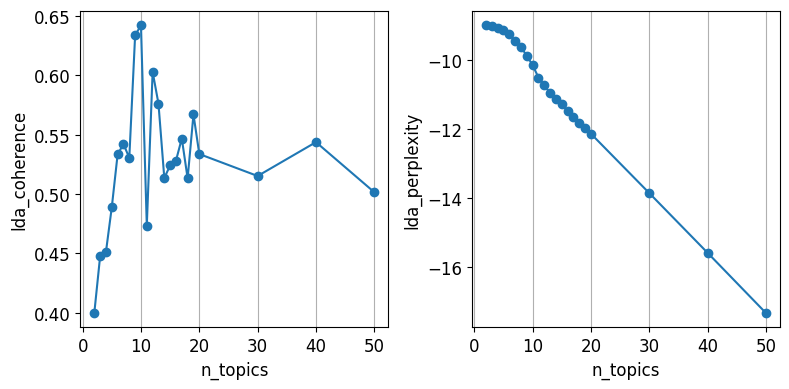

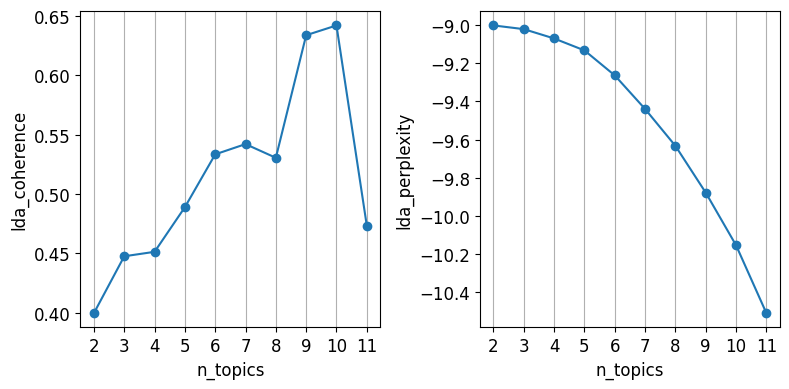

Wall time: 1h 59s


In [17]:
%%time
model_list_LDA_gensim  , data_LDA_gensim_score = applyParallel_LDA_gensim(DF_words_tags.Questions,fit_LDA_gensim,n_topics)
plot_line(data_LDA_gensim_score.iloc[0:10],'n_topics',['lda_coherence','lda_perplexity'],marker = 'o',Nb_cols=2)

In [18]:
pyLDAvis.enable_notebook()
best_topics = data_LDA_gensim_score['lda_coherence'].argmax()
texts , dictionary, corpus = gensim_prepocessing(DF_words_tags.Questions)
pyLDAvis.gensim_models.prepare(model_list_LDA_gensim[best_topics], corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.287487  0.109749       1        1  35.399507
8     -0.248472 -0.016286       2        1  18.829099
2     -0.223226  0.007085       3        1  16.005037
9     -0.218571  0.015986       4        1  15.812835
3     -0.099607 -0.203912       5        1   6.567954
1      0.173169  0.180630       6        1   2.014868
0      0.218479 -0.056958       7        1   1.703979
4      0.233533 -0.050321       8        1   1.335360
5      0.201883 -0.034588       9        1   1.293904
7      0.250300  0.048616      10        1   1.037456, topic_info=         Term          Freq         Total Category  logprob  loglift
8      import  15053.000000  15053.000000  Default  30.0000  30.0000
831    python   9968.000000   9968.000000  Default  29.0000  29.0000
151     print   9956.000000   9956.000000  Default  28.0000  28.0000
24        def   6895.000000   6895.000000  Default  27.0000  27.0000
33     return  31395.000000  31395.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1844   metric    274.306876    772.448019  Topic10  -5.4682   3.5331
17      shape    338.680843   1544.984798  Topic10  -5.2574   3.0507
566   network    253.713481   2169.975560  Topic10  -5.5463   2.4221
3530   weight    191.503069   1279.722088  Topic10  -5.8276   2.6689
379   dataset    156.209795   2128.532180  Topic10  -6.0313   1.9564

[749 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5996      5  0.995573  accesstoken
6743      1  0.002987     accuracy
6743     10  0.994728     accuracy
361      10  0.998743   activation
4295      1  0.190597     activity
...     ...       ...          ...
1371      1  0.955726         year
1371      2  0.015982         year
1371      3  0.000913         year
1371      4  0.027398         year
3082      4  0.997800         zoom

[2255 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 3, 10, 4, 2, 1, 5, 6, 8])

In [19]:
model_list_LDA_gensim[best_topics].print_topics()

[(0,
  '0.013*"android" + 0.009*"override" + 0.008*"fun" + 0.007*"val" + 0.007*"xml" + 0.006*"activity" + 0.006*"xmlns" + 0.005*"view" + 0.005*"kotlin" + 0.005*"bundle"'),
 (1,
  '0.024*"def" + 0.023*"import" + 0.019*"python" + 0.017*"self" + 0.015*"print" + 0.013*"self." + 0.011*"numpy" + 0.010*"recent" + 0.010*"traceback" + 0.008*"last"'),
 (2,
  '0.011*"code" + 0.011*"return" + 0.010*"use" + 0.010*"class" + 0.009*"string" + 0.009*"new" + 0.009*"public" + 0.008*"int" + 0.008*"void" + 0.008*"error"'),
 (3,
  '0.016*"request" + 0.013*"api" + 0.012*"response" + 0.012*"user" + 0.011*"return" + 0.010*"http" + 0.009*"error" + 0.009*"get" + 0.009*"post" + 0.008*"url"'),
 (4,
  '0.018*"spring" + 0.010*"boot" + 0.007*"java" + 0.007*"public" + 0.006*"bean" + 0.006*"class" + 0.006*"private" + 0.004*"entity" + 0.004*"final" + 0.004*"exception"'),
 (5,
  '0.017*"flutter" + 0.009*"widget" + 0.008*"context" + 0.008*"child" + 0.007*"dart" + 0.006*"buildcontext" + 0.006*"override" + 0.006*"final" + 0

### <a STYLE="padding-left:2em;color:black" id="3.1.2b">3.1.2b TD-IDF</a> 

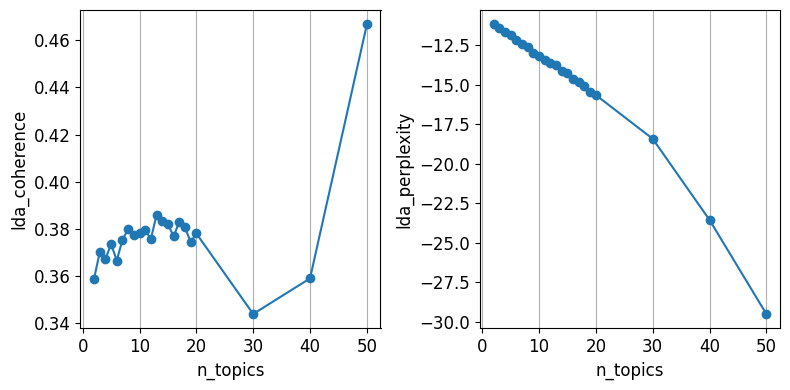

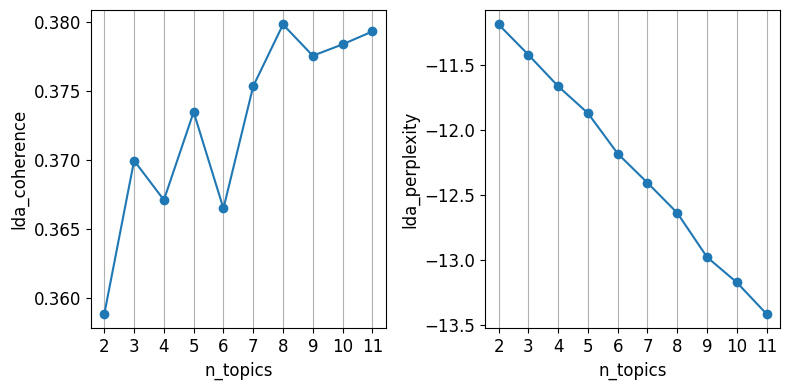

Wall time: 51min 12s


In [20]:
%%time
model_list_LDAmulticore_TF_IDF , data_LDAmulticore_TF_IDF_score = applyParallel_LDA_gensim(DF_words_tags.Questions,fit_LDAMulticore_gensim,n_topics ,TF_IDF = True )
plot_line(data_LDAmulticore_TF_IDF_score.iloc[0:10],'n_topics',['lda_coherence','lda_perplexity'],marker = 'o',Nb_cols=2)

In [21]:
pyLDAvis.enable_notebook()
best_topics = data_LDAmulticore_TF_IDF_score['lda_coherence'].argmax()
texts_TF_IDF , dictionary_TF_IDF, corpus_TF_IDF = gensim_prepocessing(DF_words_tags.Questions, TF_IDF = True)
pyLDAvis.gensim_models.prepare(model_list_LDAmulticore_TF_IDF[best_topics], corpus_TF_IDF, dictionary_TF_IDF)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.343353 -0.109633       1        1  28.870583
8      0.363530  0.071403       2        1  27.756603
36     0.250462  0.084693       3        1  10.856013
12     0.164397 -0.036575       4        1   4.977587
7      0.142297 -0.009455       5        1   3.580641
32     0.090698  0.009536       6        1   1.924865
4      0.065660 -0.011267       7        1   1.559320
16     0.039916 -0.038627       8        1   1.063655
22     0.039549  0.010310       9        1   0.703561
14    -0.008793  0.004063      10        1   0.696949
5     -0.004392 -0.000066      11        1   0.547143
0      0.011044 -0.009901      12        1   0.545427
41    -0.024473  0.003020      13        1   0.524724
48    -0.043048 -0.019271      14        1   0.517914
33    -0.044248 -0.000603      15        1   0.513382
25    -0.043334  0.004836      16        1   0.488026
28    -0.014526  0.000703      17        1   0.472859
1     -0.017171  0.009595      18        1   0.468508
46    -0.028182 -0.002433      19        1   0.467356
38    -0.042606  0.000489      20        1   0.463364
43    -0.034246  0.002055      21        1   0.462272
35    -0.022491  0.002078      22        1   0.460838
3     -0.026566  0.002008      23        1   0.458626
11    -0.042923 -0.000245      24        1   0.452182
49    -0.036690  0.001863      25        1   0.451035
13    -0.051416 -0.000088      26        1   0.448218
2     -0.039140 -0.003207      27        1   0.447972
18    -0.046480 -0.003710      28        1   0.447115
30    -0.032298  0.005358      29        1   0.445996
20    -0.026935 -0.002454      30        1   0.445063
29    -0.036080  0.001042      31        1   0.439617
10    -0.048160  0.003706      32        1   0.438795
34    -0.023052  0.002243      33        1   0.437053
27    -0.042927  0.003211      34        1   0.436395
39    -0.015467  0.005235      35        1   0.434329
19    -0.037122  0.000648      36        1   0.434024
26    -0.046055  0.005655      37        1   0.426405
6     -0.050940 -0.000061      38        1   0.424983
42    -0.049110  0.000682      39        1   0.424837
31    -0.049336 -0.000021      40        1   0.423515
9     -0.045582  0.004016      41        1   0.420558
24    -0.048307 -0.000757      42        1   0.419913
23    -0.047601  0.002338      43        1   0.419005
47    -0.049526 -0.001670      44        1   0.417307
44    -0.045962  0.001134      45        1   0.416910
45    -0.050763  0.001269      46        1   0.415765
37    -0.053956  0.001195      47        1   0.414414
21    -0.046893  0.001649      48        1   0.413535
40    -0.042398  0.001480      49        1   0.413081
15    -0.051710  0.002528      50        1   0.411765, topic_info=        Term        Freq       Total Category  logprob  loglift
970      std  315.000000  315.000000  Default  30.0000  30.0000
736      div  528.000000  528.000000  Default  29.0000  29.0000
953      c++  250.000000  250.000000  Default  28.0000  28.0000
151    print  487.000000  487.000000  Default  27.0000  27.0000
217   number  714.000000  714.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
647   column    0.120039  703.834788  Topic50 -10.0054  -3.1840
186      due    0.109195  247.063083  Topic50 -10.1000  -2.2318
440  version    0.106778  658.343053  Topic50 -10.1224  -3.2343
200       go    0.102886  425.116367  Topic50 -10.1596  -2.8340
147     make    0.098202  938.147169  Topic50 -10.2062  -3.6722

[2816 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
8293       1  0.910310         aac
1362       5  0.969454         abc
1362       6  0.037287         abc
8492       8  0.759153  absolutely
3748       5  0.955485    abstract
...      ...       ...         ...
2771       8  0.417536      yellow
10307      8  0.547138      

In [22]:
model_list_LDAmulticore_TF_IDF[best_topics].print_topics()

[(40,
  '0.000*"xdebug." + 0.000*"xdebug.idekey" + 0.000*"fgets" + 0.000*"enters" + 0.000*"sizeof" + 0.000*"fseek" + 0.000*"xdebug.log" + 0.000*"malloc" + 0.000*"syntax" + 0.000*"sscanf"'),
 (14,
  '0.002*"webpack" + 0.002*"babel" + 0.002*"loader" + 0.001*"module.exports" + 0.001*"jsx" + 0.001*"package.json" + 0.001*"devdependencies" + 0.001*"preset" + 0.001*"postcss" + 0.001*"typescript"'),
 (27,
  '0.000*"nvidia" + 0.000*"torch." + 0.000*"smi" + 0.000*"torch.cuda." + 0.000*"pytorch" + 0.000*"pwr" + 0.000*"iservicecollection" + 0.000*"gpus" + 0.000*"uncorr" + 0.000*"disp.a"'),
 (13,
  '0.001*"aes" + 0.001*"lab" + 0.000*"ggplot" + 0.000*"legend.position" + 0.000*"hjust" + 0.000*"data.frame" + 0.000*"stat" + 0.000*"axis.text.x" + 0.000*"ggplotly" + 0.000*"axis.text.y"'),
 (48,
  '0.001*"ipsum" + 0.001*"dolor" + 0.001*"amet" + 0.001*"lorem" + 0.001*"sit" + 0.001*"consectetur" + 0.001*"elit" + 0.000*"font" + 0.000*"margin" + 0.000*"adipisicing"'),
 (20,
  '0.000*"swipe" + 0.000*"reactdom.

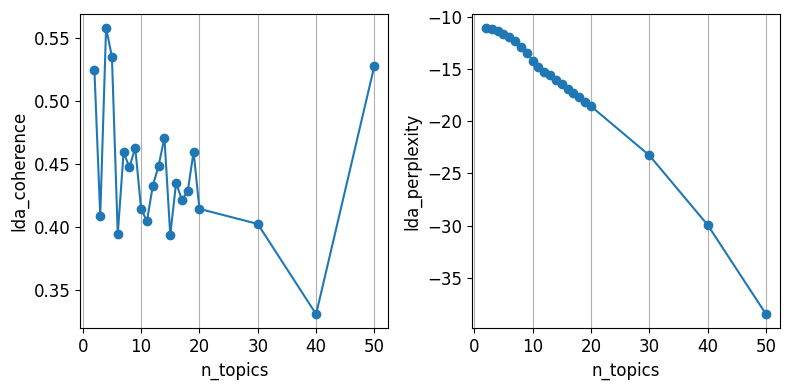

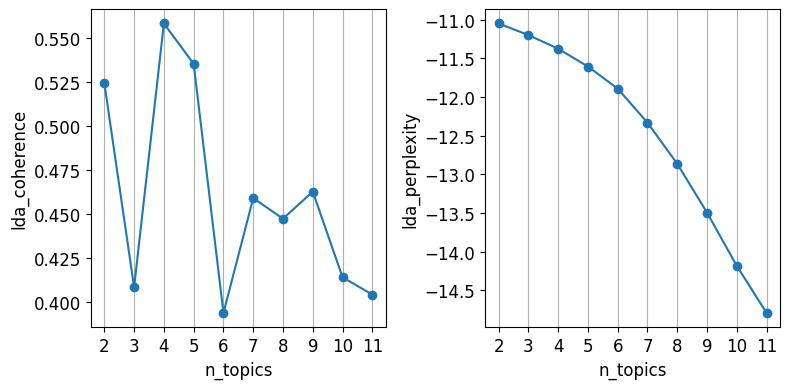

Wall time: 37min 56s


In [23]:
%%time
model_list_LDA_gensim_TF_IDF , data_LDA_gensim_TF_IDF = applyParallel_LDA_gensim(DF_words_tags.Questions,fit_LDA_gensim,n_topics,TF_IDF = True)
plot_line(data_LDA_gensim_TF_IDF.iloc[0:10],'n_topics',['lda_coherence','lda_perplexity'],marker = 'o',Nb_cols=2)

In [24]:
pyLDAvis.enable_notebook()
best_topics = data_LDA_gensim_score['lda_coherence'].argmax()
texts_TF_IDF , dictionary_TF_IDF, corpus_TF_IDF = gensim_prepocessing(DF_words_tags.Questions, TF_IDF = True)
pyLDAvis.gensim_models.prepare(model_list_LDA_gensim_TF_IDF[best_topics], corpus_TF_IDF, dictionary_TF_IDF)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.425930  0.013408       1        1  68.467328
6      0.008668 -0.147238       2        1   8.677585
2      0.060414  0.011607       3        1   5.330291
4      0.053255  0.025145       4        1   3.012492
1      0.052431  0.021548       5        1   2.853713
0      0.052317  0.022199       6        1   2.741579
7      0.050352  0.014718       7        1   2.342455
5      0.049963  0.014207       8        1   2.286703
8      0.049917  0.014163       9        1   2.263530
3      0.048612  0.010242      10        1   2.024324, topic_info=             Term         Freq        Total Category  logprob  loglift
47           like  1173.000000  1173.000000  Default  30.0000  30.0000
494          want  1184.000000  1184.000000  Default  29.0000  29.0000
538         value  1021.000000  1021.000000  Default  28.0000  28.0000
264           way  1088.000000  1088.000000  Default  27.0000  27.0000
83       function   988.000000   988.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2707       qtcore     1.628531     2.019132  Topic10  -8.9903   3.6849
2706  qpushbutton     1.490842     1.881067  Topic10  -9.0786   3.6674
8439         unix     5.454290     8.513981  Topic10  -7.7816   3.4546
5922       apikey     2.309354     3.278293  Topic10  -8.6410   3.5496
2732     sys.argv     2.240534     4.084479  Topic10  -8.6713   3.2995

[457 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
8492       5  0.987183  absolutely
5900       3  0.975053     accepts
5901       3  0.981809         act
5901       5  0.031671         act
361        4  1.004212  activation
...      ...       ...         ...
360        1  0.998193       would
360        2  0.000976       would
13581      2  1.001964       xcode
9585       2  0.988751         xxx
20094     10  0.804599         yyy

[564 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 3, 5, 2, 1, 8, 6, 9, 4])

In [25]:
model_list_LDA_gensim_TF_IDF[best_topics].print_topics()

[(0,
  '0.002*"migrate" + 0.001*"management" + 0.001*"workspace" + 0.001*"generator" + 0.001*"executable" + 0.001*"gui" + 0.001*"inspect" + 0.001*"legacy" + 0.001*"dll" + 0.001*"terraform"'),
 (1,
  '0.001*"rep" + 0.001*"gateway" + 0.001*"fontsize" + 0.001*"macbook" + 0.001*"gradient" + 0.001*"innerhtml" + 0.001*"retain" + 0.001*"opacity" + 0.001*"aria" + 0.001*"uid"'),
 (2,
  '0.002*"hide" + 0.001*"vue" + 0.001*"anybody" + 0.001*"channel" + 0.001*"embed" + 0.001*"circle" + 0.001*"flex" + 0.001*"bunch" + 0.001*"upgrade" + 0.001*"mistake"'),
 (3,
  '0.000*"tail" + 0.000*"subclass" + 0.000*"unix" + 0.000*"apr" + 0.000*"iterable" + 0.000*"beforehand" + 0.000*"urls.py" + 0.000*"grade" + 0.000*"urlpatterns" + 0.000*"linker"'),
 (4,
  '0.001*"swiftui" + 0.001*"kera" + 0.001*"pytorch" + 0.001*"tensor" + 0.001*"epoch" + 0.001*"optimizer" + 0.001*"activation" + 0.001*"models.model" + 0.001*"closest" + 0.001*"prepare"'),
 (5,
  '0.001*"emulator" + 0.001*"node.js" + 0.001*"modal" + 0.001*"faceboo

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Nous observons que les scores obtenus à partir de la librairie Sklearn <span STYLE="color:gray;" ><i>(log likelihood & perplexity )</i></span>

## <a STYLE="color:black" id="3.2">3.2 Non-Negative Matrix Factorization (NMF)</a>
<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Le modèle NMF n'ayant pas de score. Nous allons utiliser les résultats obtenus à partir de l'algorithme LDA.

In [26]:
def plot_top_words(model, feature_names, n_top_words, nb_topic_plot, title,Nb_cols = 4):
    rows = int(nb_topic_plot/Nb_cols)
    fig, axes = plt.subplots(rows, Nb_cols,figsize=(3*Nb_cols, rows*4),sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        if(topic_idx < nb_topic_plot):
            top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]

            ax = axes[topic_idx]
            bartopic = ax.barh(top_features, weights, height=0.7)
            bartopic[0].set_color('#f48023')
            ax.set_title(f'Topic {topic_idx +1}',
                         fontdict={'fontsize': 30})
            ax.invert_yaxis()
            ax.tick_params(axis='both', which='major', labelsize=20)
            for i in 'top right left'.split():
                ax.spines[i].set_visible(False)
            fig.suptitle(title, fontsize=36, color="#641E16")

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    fig.tight_layout()
    plt.show()

In [27]:
nmf = NMF(n_components=20, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
model_nmf = nmf.fit(data_words_tf_idf)

In [28]:
no_top_words = 10
display_topics(model_nmf, data_words_tf.columns, no_top_words)

Topic 0:
question also seem work see however need make case problem
Topic 1:
column row dataframe data panda c value r output date
Topic 2:
width height color background left style top center size pad
Topic 3:
public class void private string new static method override java
Topic 4:
def print python self import range return code len true
Topic 5:
api http request response url json post header data content
Topic 6:
error version run build install package fail get project command
Topic 7:
function console.log async await const let return var code catch
Topic 8:
want way use possible know achieve without example create make
Topic 9:
help thanks please advance appreciate anyone someone thank know could
Topic 10:
react export component default const import render state return div
Topic 11:
file folder path open directory read line script write command
Topic 12:
value array string object list key number type get name
Topic 13:
int main include std c++ program struct void c i++
Topic 14:
like

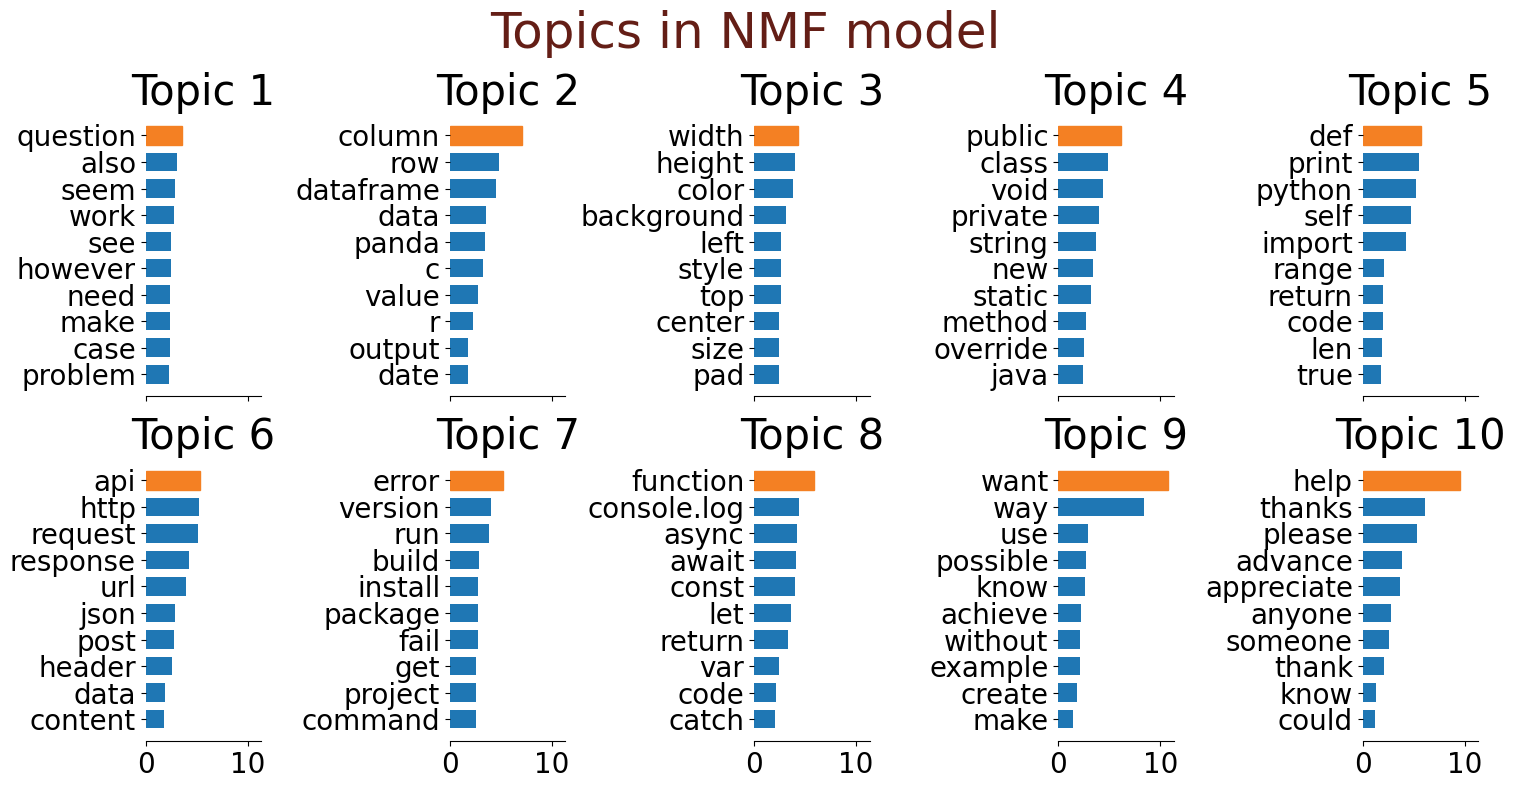

In [29]:
plot_top_words(model_nmf, data_words_tf.columns, 10, 10,'Topics in NMF model',Nb_cols = 5)

# <a STYLE="color:black" id="4">Etape 4 : Approche supervisée
## <a STYLE="color:black" id="4.1">4.1 Réduction dimensionnelle PCA</a>
## <a STYLE="padding-left:2em;color:black" id="4.1.1">4.1.1 Bag of words</a> 

In [29]:
X_train_transformed[0:25000]

array([[-0.24567818, -0.25463912,  0.96097031, ..., -0.14074557,
        -0.13172729,  0.20367414],
       [-0.53146968,  0.5846715 ,  0.33569513, ..., -0.05192779,
        -0.09159107, -0.01461068],
       [ 0.10128554, -0.26246171, -0.0640879 , ..., -0.12918202,
         0.08224628,  0.22294356],
       ...,
       [-1.19023503,  0.08392493,  0.13727934, ..., -0.14946458,
         0.08420966,  0.11498496],
       [-0.98359319, -0.18484817, -0.49696041, ..., -0.11118737,
        -0.27011432, -0.20828978],
       [-0.52742246,  0.36760656, -0.04835402, ..., -0.2786515 ,
         0.15411954,  0.10544033]])

In [30]:
def transform_pca(X_train , X_test ) :
    n_comp = X_train.shape[1]-1 
    pca = PCA(n_components=n_comp)
    pca.fit(X_train)
    display_scree_plot(pca)
    
    pca = PCA(n_components=0.85, random_state=42)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_test_transformed = pca.transform(X_test)
    print(f"Nombre de composantes principales: {pca.components_.shape[0]}")
    return X_train_transformed , X_test_transformed , pca

In [31]:
X_train ,X_test ,y_train ,y_test = train_test_split(data_words_tf, DF_words_tags.Tags , test_size=0.2, random_state=10)

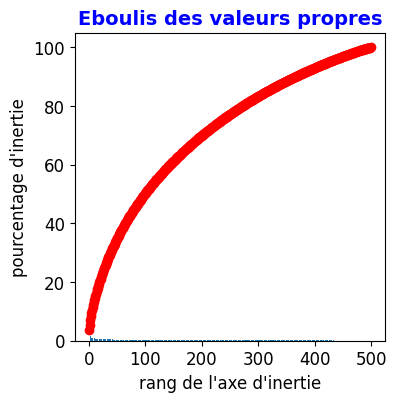

Nombre de composantes principales: 316


['./Models/pca_model.joblib']

In [32]:
X_train_transformed , X_test_transformed , pca_model= transform_pca(X_train , X_test )
dump(pca_model, './Models/pca_model.joblib',compress = True)

## <a STYLE="padding-left:2em;color:black" id="4.1.2">4.1.2 TF-IDF</a> 

In [33]:
X_train_tf_idf ,X_test_tf_idf ,y_train_tf_idf ,y_test_tf_idf = train_test_split(data_words_tf_idf, DF_words_tags.Tags , test_size=0.2, random_state=10)

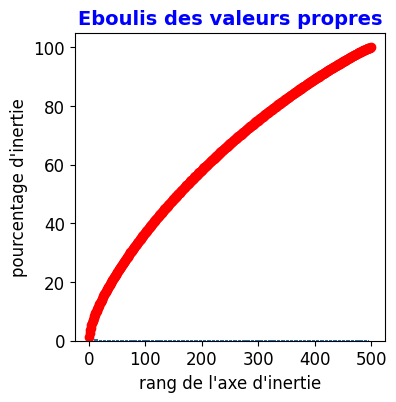

Nombre de composantes principales: 369


['./Models/pca_tfidf_model.joblib']

In [34]:
X_train_transformed_tf_idf, X_test_transformed_tf_idf, pca_tfidf_model = transform_pca(X_train_tf_idf , X_test_tf_idf )
dump(pca_tfidf_model, './Models/pca_tfidf_model.joblib',compress = True)

## <a STYLE="color:black" id="4.2">4.2 Tests de modèle de classification</a>
## <a STYLE="padding-left:2em;color:black" id="4.2.1">4.2.1 Bag of words</a> 

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Vectorisation des tags afin de pouvoir entrainer les modèles de classification supervisés

In [35]:
%%time
mlb = MultiLabelBinarizer(classes =list(counter_tags.keys()) )
train_labels = mlb.fit_transform(y_train.apply(lambda x : x.split()))
test_labels = mlb.transform(y_test.apply(lambda x : x.split()))

Wall time: 502 ms


In [36]:
def score_metrics(model,DF, y_true, y_pred , time = None):
    if DF is not None:
        DF = DF
    else:
        DF = pd.DataFrame(index=["Accuracy","Precision","Recall","F1",'time (s)'],columns=[model])    
    scores = []
    scores.append(accuracy_score(y_true,y_pred))
    scores.append(precision_score(y_true,y_pred,average='weighted'))
    scores.append(recall_score(y_true,y_pred,average='weighted'))
    scores.append(f1_score(y_pred,y_true,average='weighted'))
    if time is not None :
        scores.append(time)  
    DF[model] = scores
    DF.index= ["Accuracy","Precision","Recall","F1",'time (s)']
    return DF

In [37]:
@mem.cache 
def fit_model(model, X_train ,X_test ,y_train ,y_test) : 
    DF_score = pd.DataFrame()
    DF_model = pd.DataFrame()
    list_model , list_predict , list_score =  [],[],[]
    for nom_algo , algo in model.items():
        t0 = time()
        model_fit = algo.fit(X_train, y_train)
        predict = model_fit.predict(X_test)
        DF_score = score_metrics(nom_algo,DF=DF_score, y_true =y_test,y_pred= predict , time = time()-t0)
        list_model.append(model_fit)
    
    DF_model['algorithmes'] = model.keys()
    DF_model['modele_fit'] = list_model
    
    return DF_model, DF_score

In [38]:
def predict_tags(model,model_multilabel, X_test , y_true , Nb_tags = 5 ) : 
    y_predict = model.predict(X_test)
    y_pred_inverse = model_multilabel.inverse_transform(y_predict)
    y_True_inverse = model_multilabel.inverse_transform(y_true)
    print(f'Tags prédit : {y_pred_inverse[0:Nb_tags]} ')
    print(f'Tags True : {y_True_inverse[0:Nb_tags]} ')

In [39]:
liste_modele = {'KNN' :  KNN(n_neighbors=3,n_jobs=-1),
                'LogisticR' : OneVsRestClassifier(LogisticRegression(class_weight='balanced',n_jobs=-1),n_jobs=-1),
                'SVM' : OneVsRestClassifier(LinearSVC(multi_class = 'ovr'),n_jobs=-1),
                'RFC' : OneVsRestClassifier(RandomForestClassifier(n_jobs=-1),n_jobs=-1),
                'GBC' : OneVsRestClassifier(GradientBoostingClassifier(),n_jobs=-1)
               }

In [ ]:
%%time
DF_model, DF_score = fit_model(liste_modele ,X_train_transformed[0:25000],X_test_transformed[0:25000],
                               train_labels[0:25000],test_labels[0:25000])
DF_score

In [ ]:
model_svm = {'SVM' : OneVsRestClassifier(LinearSVC(multi_class = 'ovr'),n_jobs=-1),}

In [ ]:
%%time
DF_model_svm, DF_score_svm = fit_model(model_svm ,X_train_transformed,X_test_transformed,train_labels,test_labels)
DF_score_svm

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Nous observons que le modèle SVM offre les meilleurs performances en prenant en compte le score F1 qui correspond à la moyenne harmonique entre la précision et le recall.

In [ ]:
svm_model = DF_model_svm['modele_fit'][0]
dump(svm_model, './Models/svm_model.joblib',compress = True)
predict_tags(svm_model, mlb ,X_test_transformed ,test_labels)

## <a STYLE="padding-left:2em;color:black" id="4.2.2">4.2.2 TF-IDF</a> 

In [ ]:
%%time
DF_model_tf_idf, DF_score_tf_idf = fit_model(liste_modele ,X_train_transformed_tf_idf[0:25000],X_test_transformed_tf_idf[0:25000],
                                             y_train_tf_idf[0:25000],y_test_tf_idf[0:25000])    
DF_score_tf_idf

In [ ]:
%%time
DF_model_svm_tf_idf, DF_score_svm_tf_idf = fit_model(model_svm ,X_train_transformed_tf_idf,X_test_transformed_tf_idf,y_train_tf_idf,y_test_tf_idf) 
DF_score_svm_tf_idf

<p STYLE="padding-left:1em ; color:blue;text-align: justify;"> <b>Nous observons 

In [ ]:
svm_model_TF_IDF = DF_model_svm_tf_idf['modele_fit'][0]
dump(svm_model_TF_IDF, './Models/svm_model_TF_IDF.joblib',compress = True)
predict_tags(svm_model_TF_IDF, mlb ,X_test_transformed ,test_labels)

In [ ]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

signature = infer_signature(X_train_transformed , test_labels)
mlflow.sklearn.save_model(svm_model , 'mlflow_model'  ,signature=signature  )

signature_tfidf = infer_signature(X_train_tf_idf , y_train_tf_idf)
mlflow.sklearn.save_model(svm_model_TF_IDF , 'mlflow_model_tfidf',signature=signature_tfidf )